## Coeficiente de correlacion de Pearson
El coeficiente de correlación de pearson nos da la medida de lo bien  o mal que se asemeja una distribución a una funcion dada (lineal, exponencial, ...) o a otra variable paralela.

````latex notation````
\begin{equation}
r=\frac{\sum_{i=1}{(x_{i}-X)(y_{i}-Y)}}{\sqrt{(x_{i}-X)^2(y_{i}-Y)^2}}
\\ \text{Donde X es la media de la distribución de x, Y la media de la distribución de y}
\end{equation}

El coef de relación de Pearson está entre 0 y 1. Cuanto más proximo a +-1 mas fuerte la correlación (positiva o negativa) cuanto más próxima a 0 más débil. 

Como ejercicio vamos a comparar las ventas de un producto con su publicidad.
### Al lio
First, the libraries:

In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image         # para incluir imagenes local

In [69]:
data_ads = pd.read_csv("../../datasets/ads/advertising.csv")
data_ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [17]:
data_ads.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Para ir calculando la correlación en una columna nueva, primero calculo el denominador y luego le divido el numerador. Lo hacemos para cada medio: TV, radio y periodicos

In [70]:
data_ads["corrn_TV"] = (data_ads["TV"]-np.mean(data_ads["TV"]))*(data_ads["Sales"]-np.mean(data_ads["Sales"]))
data_ads["corrn_Radio"] = (data_ads["Radio"]-np.mean(data_ads["Radio"]))*(data_ads["Sales"]-np.mean(data_ads["Sales"]))
data_ads["corrn_Newspaper"] = (data_ads["Newspaper"]-np.mean(data_ads["Newspaper"]))*(data_ads["Sales"]-np.mean(data_ads["Sales"]))

In [71]:
data_ads["corr1_TV"] = (data_ads["TV"]-np.mean(data_ads["TV"]))**2
data_ads["corr1_Radio"] = (data_ads["Radio"]-np.mean(data_ads["Radio"]))**2
data_ads["corr1_Newspaper"] = (data_ads["Newspaper"]-np.mean(data_ads["Newspaper"]))**2
data_ads["corr1_Sales"] = (data_ads["Sales"]-np.mean(data_ads["Sales"]))**2

In [72]:
data_ads

,TV,Radio,Newspaper,Sales,corrn_TV,corrn_Radio,corrn_Newspaper,corr1_TV,corr1_Radio,corr1_Newspaper,corr1_Sales
0,230.1,37.8,69.2,22.1,670.896956,117.41454,312.163065,6898.548306,211.295296,1493.513316,65.246006
1,44.5,39.3,45.1,10.4,371.460206,-58.09041,-52.692885,10514.964306,257.153296,211.586116,13.122506
2,17.2,45.9,69.3,9.3,613.181206,-106.89851,-182.977985,16859.074806,512.388496,1501.252516,22.302006
3,151.5,41.3,58.5,18.5,19.958456,80.75619,125.128215,19.869306,325.297296,780.978916,20.048006
4,180.8,10.8,58.4,12.9,-37.892794,13.99084,-31.257135,1139.568806,155.351296,775.399716,1.260006
...,...,...,...,...,...,...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,699.040956,125.64979,107.602565,11846.689806,382.750096,280.696516,41.248506
196,94.2,4.9,8.1,9.7,228.411706,79.37839,97.057415,2792.329806,337.236496,504.182116,18.684006
197,177.0,9.3,6.4,12.8,-36.623044,17.07099,29.528265,897.451806,194.993296,583.415716,1.494506
198,283.6,42.0,66.2,25.5,1567.338706,215.04244,409.126965,18647.950806,351.037696,1270.637316,131.733006


In [31]:
corr_pearson_TV = sum(data_ads["corrn_TV"])/np.sqrt(sum(data_ads["corr1_TV"])*sum(data_ads["corr1_Sales"]))
print ("corr_pearson_TV = {}".format(corr_pearson_TV))
corr_pearson_Radio = sum(data_ads["corrn_Radio"])/np.sqrt(sum(data_ads["corr1_Radio"])*sum(data_ads["corr1_Sales"]))
print ("corr_pearson_Radio = {}".format(corr_pearson_Radio))
corr_pearson_Newspaper = sum(data_ads["corrn_Newspaper"])/np.sqrt(sum(data_ads["corr1_Newspaper"])*sum(data_ads["corr1_Sales"]))
print ("corr_pearson_Newspaper = {}".format(corr_pearson_Newspaper))

corr_pearson_TV = 0.782224424861606
corr_pearson_Radio = 0.576222574571055
corr_pearson_Newspaper = 0.22829902637616534


El gasto en TV es mucho mas correlativo con las ventas. 

### Funcion correlación de pearson
Si quisieramos pasar esto a una funcion:

In [52]:
def corr_coef(df, var1, var2):
    df["corrn"] =  (df[var1]-np.mean(df[var1]))*(df[var2]-np.mean(df[var2]))
    data_ads["corr1"] = (data_ads[var1]-np.mean(data_ads[var1]))**2
    data_ads["corr2"] = (data_ads[var2]-np.mean(data_ads[var2]))**2
    corr_pearson = sum(data_ads["corrn"])/np.sqrt(sum(data_ads["corr1"])*sum(data_ads["corr2"]))
    print ("corr_pearson_{}_{} = {}".format(var1, var2, corr_pearson))
    return 

In [53]:
corr_coef(data_ads, "Radio", "Newspaper")

corr_pearson_Radio_Newspaper = 0.35410375076117545


Y ya si queremos correlatar todo con todo, primero recargamos el dataframe.



In [66]:
data_ads = pd.read_csv("../../datasets/ads/advertising.csv")
cols = data_ads.columns.values

for x in cols:
    for y in cols:
       corr_coef(data_ads, x, y) 

corr_pearson_TV_TV = 1.0
corr_pearson_TV_Radio = 0.05480866446583006
corr_pearson_TV_Newspaper = 0.056647874965056993
corr_pearson_TV_Sales = 0.782224424861606
corr_pearson_Radio_TV = 0.05480866446583006
corr_pearson_Radio_Radio = 1.0
corr_pearson_Radio_Newspaper = 0.35410375076117545
corr_pearson_Radio_Sales = 0.576222574571055
corr_pearson_Newspaper_TV = 0.056647874965056993
corr_pearson_Newspaper_Radio = 0.35410375076117545
corr_pearson_Newspaper_Newspaper = 1.0
corr_pearson_Newspaper_Sales = 0.22829902637616534
corr_pearson_Sales_TV = 0.782224424861606
corr_pearson_Sales_Radio = 0.576222574571055
corr_pearson_Sales_Newspaper = 0.22829902637616534
corr_pearson_Sales_Sales = 1.0


In [67]:
data_ads

,TV,Radio,Newspaper,Sales,corrn,corr1,corr2
0,230.1,37.8,69.2,22.1,65.246006,65.246006,65.246006
1,44.5,39.3,45.1,10.4,13.122506,13.122506,13.122506
2,17.2,45.9,69.3,9.3,22.302006,22.302006,22.302006
3,151.5,41.3,58.5,18.5,20.048006,20.048006,20.048006
4,180.8,10.8,58.4,12.9,1.260006,1.260006,1.260006
...,...,...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,41.248506,41.248506,41.248506
196,94.2,4.9,8.1,9.7,18.684006,18.684006,18.684006
197,177.0,9.3,6.4,12.8,1.494506,1.494506,1.494506
198,283.6,42.0,66.2,25.5,131.733006,131.733006,131.733006


In [56]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Gastos en TV vs Ventas')

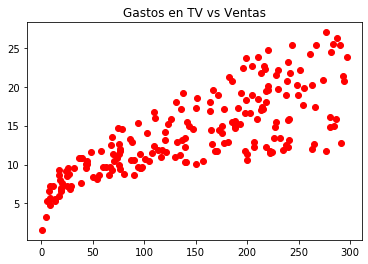

In [59]:
plt.plot(data_ads["TV"], data_ads["Sales"], "ro")
plt.title("Gastos en TV vs Ventas")

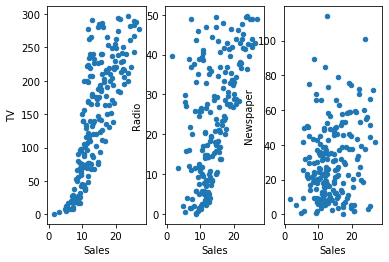

In [64]:
figure, axmins = plt.subplots(1,3, sharey=False, sharex=True)


data_ads.plot(kind="scatter", y = "TV", x ="Sales" , ax=axmins[0])
data_ads.plot(kind="scatter", y = "Radio", x ="Sales" , ax=axmins[1])
data_ads.plot(kind="scatter", y = "Newspaper", x ="Sales" , ax=axmins[2])



In [74]:
data_ads = pd.read_csv("../../datasets/ads/advertising.csv")
data_ads.corr()


,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


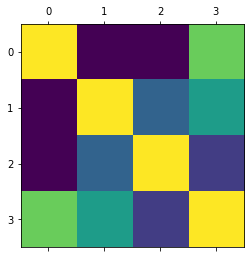

In [75]:
plt.matshow(data_ads.corr())